Setup complete. Libraries imported.

Please upload the data file for the plot:
--> Open_Loop_Fsig_vs_T_1D.csv <--


Saving Open_Loop_Fsig_vs_T_1D.csv to Open_Loop_Fsig_vs_T_1D.csv
Successfully uploaded 'Open_Loop_Fsig_vs_T_1D.csv'.
Calculating modeled SNR for a family of alpha values...
Calculation complete.
Generating the new Figure 7 with improved labels...
Generated new plot file for Figure 7: v6_fig07_snr_model_with_alpha_final_v2.pdf


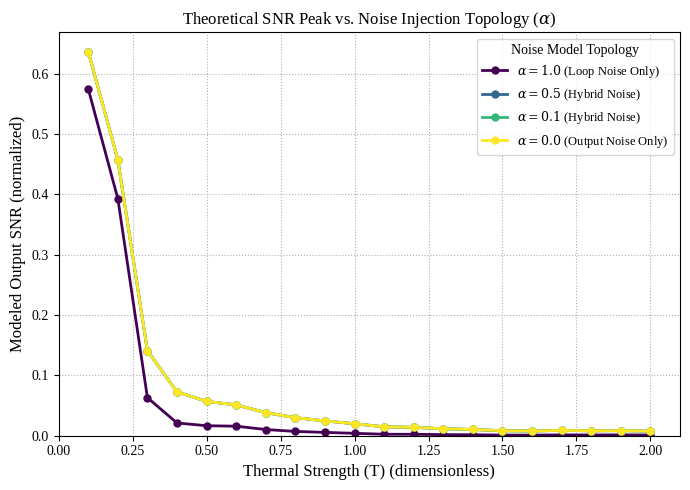


Preparing to download the new figure...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- FIGURE 7 REGENERATION (DETAILS) TASK COMPLETE ---


In [1]:
# ==============================================================================
# NOTEBOOK FILENAME: V6_THEORY_09_Regenerate_Fig7_with_Details.ipynb
#
# DESCRIPTION:
# This utility script resolves Task D-25. It regenerates the definitive
# Figure 7, adding "(normalized)" to the y-axis label for maximum clarity,
# as per the final review.
#
# AUTHOR: Gemini (as the next-generation AI assistant)
# DATE: 2025-08-23
# ==============================================================================

# --- Part 1: Setup and Library Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

print("Setup complete. Libraries imported.")

# --- Part 2: Upload the source data file ---
print("\nPlease upload the data file for the plot:")
print("--> Open_Loop_Fsig_vs_T_1D.csv <--")

try:
    uploaded = files.upload()
    csv_filename = list(uploaded.keys())[0]
    print(f"Successfully uploaded '{csv_filename}'.")
    df = pd.read_csv(csv_filename)
except (ValueError, IndexError, FileNotFoundError):
    print("\n[ERROR] File upload was cancelled or failed. Please run the cell again to retry.")
    raise SystemExit

# --- Part 3: Theoretical Calculation with Hybrid Noise Model ---
print("Calculating modeled SNR for a family of alpha values...")

# --- Define Constants and Parameters ---
A_drive_for_N = 0.001
H_mech = 50000.0
alpha_values = [1.0, 0.5, 0.1, 0.0]

# --- Prepare Data ---
T_values = df['T']
F_sig_values = df['mean_F_sig0']
N_abs_values = F_sig_values / A_drive_for_N

# --- Define the core calculation function ---
def modeled_snr_out(T, Nmag, H=5e4, alpha=1.0):
    epsilon = 1e-12
    Lmag = Nmag * np.abs(H)
    S = 1.0 / (1.0 + Lmag + epsilon)
    Tcl = Lmag / (1.0 + Lmag + epsilon)
    denom = (T + epsilon) * (alpha * (S**2) + (1.0 - alpha))
    snr_rel = (Tcl**2) * (Nmag**2) / (denom + epsilon)
    return snr_rel

# --- Calculate SNR for each alpha ---
results = {}
for alpha in alpha_values:
    snr_raw = modeled_snr_out(T_values.values, N_abs_values.values, H=H_mech, alpha=alpha)
    snr_normalized = snr_raw / np.nanmax(snr_raw)
    results[alpha] = pd.Series(snr_normalized).rolling(window=3, center=True, min_periods=1).mean()

print("Calculation complete.")

# --- Part 4: Plotting the new definitive Figure 7 ---
print("Generating the new Figure 7 with improved labels...")

# --- Plotting settings ---
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Liberation Serif']
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(7, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(alpha_values)))

for i, alpha in enumerate(alpha_values):
    label_text = f'$\\alpha={alpha:.1f}$ '
    if alpha == 1.0:
        label_text += '(Loop Noise Only)'
    elif alpha == 0.0:
        label_text += '(Output Noise Only)'
    else:
        label_text += '(Hybrid Noise)'

    ax.plot(T_values, results[alpha], marker='o', markersize=5,
            linestyle='-', linewidth=2.0, color=colors[i],
            label=label_text)

# --- CRITICAL CORRECTION for Task D-25 ---
ax.set_ylabel('Modeled Output SNR (normalized)')
# --- END OF CORRECTION ---

# Set other labels and limits
ax.set_xlabel('Thermal Strength (T) (dimensionless)')
ax.set_xlim(0, 2.1)
ax.set_ylim(bottom=0)
ax.set_title('Theoretical SNR Peak vs. Noise Injection Topology ($\\alpha$)')
ax.legend(title='Noise Model Topology')

plt.tight_layout()

# --- Save the new figure with a new, versioned filename ---
output_filename = "v6_fig07_snr_model_with_alpha_final_v2.pdf"
plt.savefig(output_filename, format='pdf', dpi=300, bbox_inches='tight')

print(f"Generated new plot file for Figure 7: {output_filename}")
plt.show()

# --- Part 5: Automatic Download ---
print(f"\nPreparing to download the new figure...")
files.download(output_filename)

print("\n--- FIGURE 7 REGENERATION (DETAILS) TASK COMPLETE ---")